In [23]:
import os
os.environ["SDSS_LOCAL_SAS_MIRROR"]="/data/jdli/sdss/"
os.environ["RESULTS_VERS"]="dr17"
os.environ["GAIA_TOOLS_DATA"]="/data/jdli/gaia/"

%matplotlib inline
%load_ext autoreload
%autoreload 2
from pylab import *

from astropy.table import Table, join
from astropy.io import fits
from tqdm import tqdm
import numpy as np
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmasher as cmr
cmap = plt.get_cmap('cmr.dusk')   # MPL


def draw_compare_sim(ax, out_lst, y_lst, xmin=-2, xmax=0.5):
    xx = np.linspace(xmin, xmax)
    
    norm_res = y_lst-out_lst
    print(np.nanstd(norm_res), np.nanmean(norm_res))
    ax.plot(xx, xx, ls=':', lw=3, c='k', zorder=5)
    ax.hist2d(y_lst, out_lst, bins=200, cmap=cmap, zorder=4, norm=LogNorm())
    ax.set_xlim([xmin, xmax]);
    ax.set_ylim([xmin, xmax]);
    ax.set_ylabel(r"Trans.");
    # ax.annotate("scatter = %.4f dex"%(np.nanstd(norm_res)), 
    #             (0.58, 0.35), xycoords="figure fraction",zorder=3)
    # ax.annotate("  bias   = %.4f dex"%(np.nanmean(norm_res)), 
    #             (0.58, 0.40), xycoords="figure fraction",zorder=3)
    
    divider = make_axes_locatable(ax)
    ax_s = divider.append_axes("bottom", size="33%", pad=0)

    ax.figure.add_axes(ax_s)
    ax_s.scatter(y_lst, norm_res, color="grey", s=1, zorder=5)
    ax_s.axhline(y=0, c='k', zorder=6, lw=3, ls=":")
    ax_s.set_xlabel(r"APOGEE");
    ax_s.set_ylim([-0.36, 0.36]);
    ax_s.set_xlim([xmin, xmax]);
    
    ax.set_xticks([]);

    return ax, ax_s


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

from matplotlib.colors import LogNorm


In [4]:
data_dir = "/data/jdli/gaia/"
df = pd.read_csv(data_dir+"xp_valid.csv")
print(df.shape, df.columns)

(72405, 64) Index(['source_id', 'moh_model_cross', 'aom_model_cross', 'moh_model_same',
       'aom_model_same', 'set_id', 'APOGEE_ID', 'TELESCOPE', 'FIELD', 'ALT_ID',
       'RA', 'DEC', 'GLON', 'GLAT', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR',
       'AK_TARG', 'AK_TARG_METHOD', 'AK_WISE', 'SFD_EBV', 'SNR', 'SNREV',
       'STARFLAG', 'STARFLAGS', 'ANDFLAG', 'ANDFLAGS', 'VHELIO_AVG',
       'VSCATTER', 'VERR', 'GAIAEDR3_SOURCE_ID', 'GAIAEDR3_PARALLAX',
       'GAIAEDR3_PARALLAX_ERROR', 'GAIAEDR3_PMRA', 'GAIAEDR3_PMRA_ERROR',
       'GAIAEDR3_PMDEC', 'GAIAEDR3_PMDEC_ERROR', 'GAIAEDR3_PHOT_G_MEAN_MAG',
       'GAIAEDR3_PHOT_BP_MEAN_MAG', 'GAIAEDR3_PHOT_RP_MEAN_MAG',
       'GAIAEDR3_DR2_RADIAL_VELOCITY', 'GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR',
       'GAIAEDR3_R_MED_GEO', 'GAIAEDR3_R_LO_GEO', 'GAIAEDR3_R_HI_GEO',
       'GAIAEDR3_R_MED_PHOTOGEO', 'GAIAEDR3_R_LO_PHOTOGEO',
       'GAIAEDR3_R_HI_PHOTOGEO', 'ASPCAPFLAG', 'ASPCAPFLAGS', 'TEFF',
       'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'M_H', '

0.023927553813919512 0.002649793289211424
0.023969511936715843 0.002467216652598141


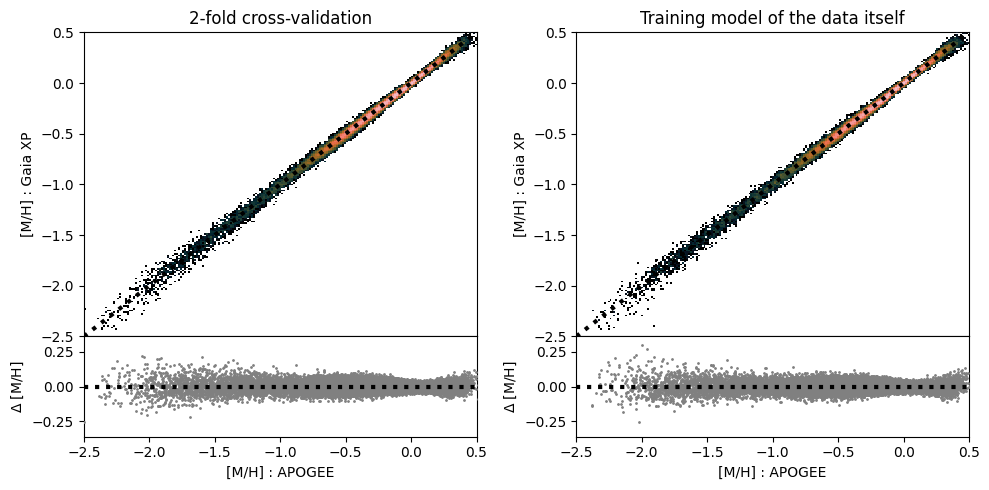

In [30]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

ylabel = ['moh_model_cross', 'moh_model_same']
for i,ax in enumerate(axs.ravel()):

    ax, ax_s = draw_compare_sim(ax, df['M_H'], df[ylabel[i]], xmin=-2.5, xmax=0.5)

    ax_s.set_xlabel(r"[M/H] : APOGEE");
    ax_s.set_ylabel(r'$\Delta$ [M/H]');
    ax.set_ylabel(r"[M/H] : Gaia XP");
    
    if i==0:
        ax.set_title("2-fold cross-validation");
    else:
        ax.set_title("Training model of the data itself");
        
plt.tight_layout()

0.0171051440762543 -0.0011256201027086286
0.017101684455832177 -0.0010166926495481783


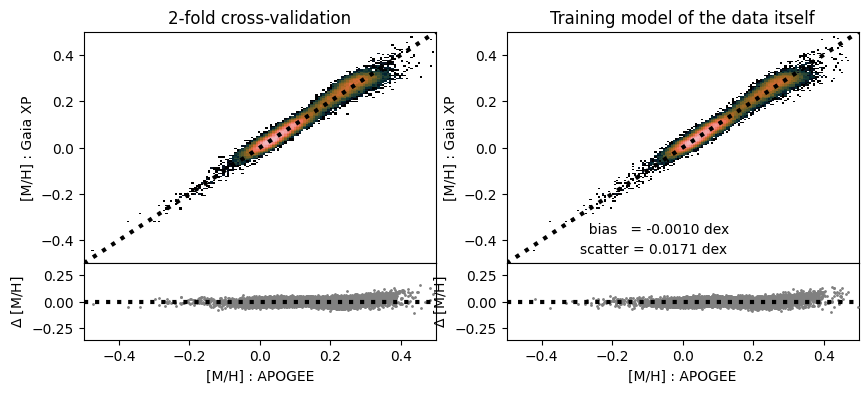

In [20]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
ax1, ax2 = axs.ravel()

ylabel = ['aom_model_cross', 'aom_model_same']
for i,ax in enumerate(axs.ravel()):

    ax, ax_s = draw_compare_sim(ax, df['ALPHA_M'], df[ylabel[i]], xmin=-0.5, xmax=0.5)
    
    if i==0:
        ax.set_title("2-fold cross-validation");
    else:
        ax.set_title("Training model of the data itself");

In [47]:
from astropy.io import ascii
import seaborn as sns
from astropy.table import Table

octable = Table.read("J_A+A_661_A118_table2.dat.gz.fits")
ocdf = octable.to_pandas()
print(ocdf.shape, ocdf.columns)

(25466, 13) Index(['Seq', 'Cluster', 'GaiaEDR3', 'RAdeg', 'DEdeg', 'GLON', 'GLAT', 'plx',
       'pmRA', 'pmDE', 'RV', 'Gmag', 'BP-RP'],
      dtype='object')


In [49]:
from astroquery.gaia import Gaia
Gaia.login()

#jli06
#zwHD5BFFcbT@HZW

INFO: Login to gaia TAP server [astroquery.gaia.core]


User:  jli06
Password:  ········


OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK


In [50]:
def chunks(lst, n):
    ""
    "Split an input list into multiple chunks of size =< n"
    ""
    for i in range(0, len(lst), n):
        yield lst[i:i+n]
        
        
dl_threshold = 5000               # DataLink server threshold. It is not possible to download products for more than 5000 sources in one single call.
ids          = octable['GaiaEDR3']
ids_chunks   = list(chunks(ids, dl_threshold))
datalink_all = []


print(f'* Input list contains {len(ids)} source_IDs')
print(f'* This list is split into {len(ids_chunks)} chunks of <= {dl_threshold} elements each')

* Input list contains 25466 source_IDs
* This list is split into 6 chunks of <= 5000 elements each


In [51]:
retrieval_type = 'XP_SAMPLED'          # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'COMBINED'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release   = 'Gaia DR3' # Options are: 'Gaia DR3' (default), 'Gaia DR2'
dl_key         = f'{retrieval_type}_{data_structure}.xml'

datalink_all = []

# dl_keys  = [inp for inp in datalink.keys()]
# dl_keys.sort()

ii = 0
for chunk in ids_chunks:
    ii+=1
    print(f'Downloading Chunk #{ii}; N_files = {len(chunk)}')
    datalink  = Gaia.load_data(ids=chunk,
                               data_release = data_release, 
                               retrieval_type=retrieval_type, format='votable',
                               data_structure=data_structure)
    
    datalink_all.append(datalink)

In [52]:
product_list_tb  = [item for sublist in datalink_all for item in sublist[dl_key]]
product_list_ids = [item.get_field_by_id("source_id").value for sublist in datalink_all for item in sublist[dl_key]]


from tqdm import tqdm

xp_spec = np.zeros([len(product_list_tb), 343, 3])

for kk,tab in tqdm(enumerate(product_list_tb)):
    
    xp_spec[kk,:,0] = tab.array['wavelength'].data
    flux, eflux = tab.array['flux'].data, tab.array['flux_error'].data
    flux[flux<=0.], eflux[eflux<=0.] = np.nanmean(flux), np.nanmean(eflux)
    
    xp_spec[kk,:,1] = np.log10(flux)
    xp_spec[kk,:,2] = np.log10(eflux)
    
    
    
data_dir = "/data/jdli/gaia/"

np.save(data_dir+"ocCastroGinard_xp_raw.npy",
        {'spec':xp_spec, 
         'source_id':product_list_ids})

5785it [00:00, 5844.90it/s]


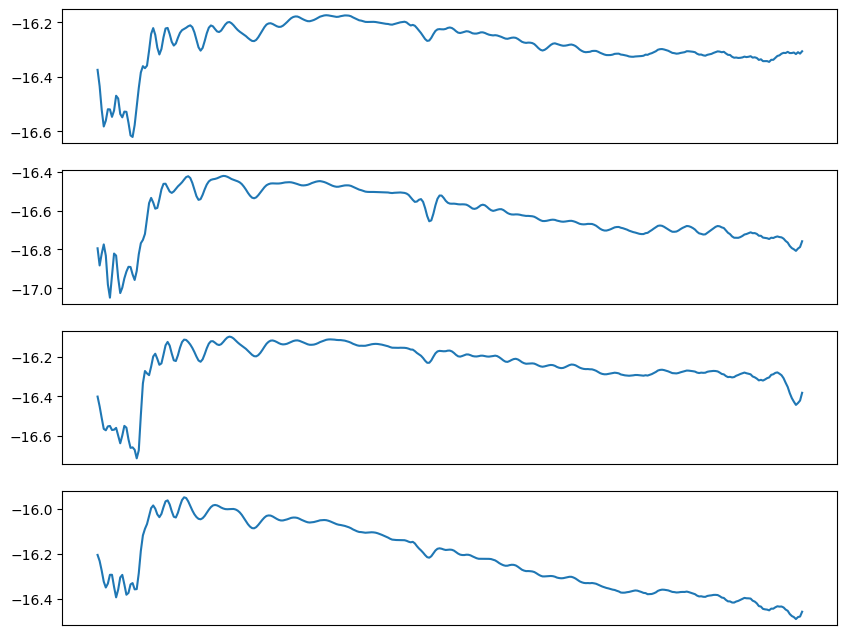

In [57]:
idx_lst = [0, 10, 100, 1000,]
fig, axs = plt.subplots(len(idx_lst), 1, figsize=(10, 2*len(idx_lst)))

for i,idx in enumerate(idx_lst):
    axs[i].plot(
        xp_spec[idx,:,0], 
        xp_spec[idx,:,1],
    )
    axs[i].set_xticks([]);


In [59]:
import sys
sys.path.append("/home/jdli/TransSpectra/")

import torch
from torch.utils.data import DataLoader
from transformer import TransformerReg
from data import GaiaXPlabel
from matplotlib.colors import LogNorm
import cmasher as cmr


In [61]:
dim_val = 64 # This can be any value divisible by n_heads. 512 is used in the original transformer paper.
n_heads = 4 # The number of attention heads (aka parallel attention layers). dim_val must be divisible by this number
n_decoder_layers = 2 # Number of times the decoder layer is stacked in the decoder
n_encoder_layers = 2 # Number of times the encoder layer is stacked in the encoder
extd_size = 0

input_size = 1 # The number of input variables. 1 if univariate forecasting.
enc_seq_len = 343 # length of input given to encoder. Can have any integer value.
dec_seq_len = 2 # length of input given to decoder. Can have any integer value.
output_sequence_length = 2 # Length of the target sequence, i.e. how many time steps should your forecast
max_seq_len = 343 # What's the longest sequence the model will encounter? Used to make the positional encoder

device = torch.device('cuda:1')

modelA = TransformerReg(
    dim_val=dim_val, input_size=input_size,batch_first=True, dec_seq_len=dec_seq_len, 
    out_seq_len=output_sequence_length, n_decoder_layers=n_decoder_layers,n_encoder_layers=n_encoder_layers, n_heads=n_heads,
    max_seq_len=max_seq_len,
    ).to(device)


model_name_A = '/model/trsfm_GXP_221101Aep100.pt'

modelA.load_state_dict(torch.load(data_dir+model_name_A))

<All keys matched successfully>

In [76]:
criterion = torch.nn.MSELoss()

def predict(specs, model):
    out_lst = np.array([])
    loss_lst = np.array([])
    id_lst = []

    with torch.no_grad():
        for data in tqdm(specs):
            
            x =  torch.tensor(data[:,1].reshape(1,-1,1).astype(np.float32)).to(device)
            y = torch.tensor(np.vstack([0, 0]).reshape(1,-1,1).astype(np.float32)).to(device)
            output = model(x, y)
            
            loss = criterion(y, output)
            loss_lst = np.append(loss_lst, loss.cpu().numpy())
            out_lst = np.append(out_lst, output.cpu().numpy())
            del x, y, output
            # for idl in id_batch:
            #     id_lst.append(idl)

    out_lst = np.array(out_lst).reshape(-1,2)
    return out_lst, loss_lst

preds = predict(xp_spec, modelA)

100%|███████████████████████████████████████████████████████████████████| 5785/5785 [00:36<00:00, 156.75it/s]


In [173]:

idx =100
x = torch.tensor(xp_spec[0,:,1].reshape(1,-1,1).astype(np.float32)).to(device)
y = torch.tensor(np.vstack([moh_rand, aom_rand]).astype(np.float32)).reshape(-1, 2, 1).to(device)


In [178]:
print(x.shape, y.shape)

torch.Size([1, 343, 1]) torch.Size([1000, 2, 1])


In [172]:
criterion = torch.nn.MSELoss()

moh_rand = np.random.uniform(-4.0, 0.6, 1000)
aom_rand = np.random.uniform(-1.0, 1.0, 1000)
y = torch.tensor(np.vstack([moh_rand, aom_rand]).astype(np.float32)).reshape(-1, 2, 1).to(device)

with torch.no_grad():
    output = np.array([modelA(x, y[i].reshape(1,2,1)).cpu().numpy() for i in range(1000)])
    

In [160]:
def mse(A,B, ax=0):
    return ((A - B)**2).mean(axis=ax)

loss = mse(output, y, ax=1)

In [155]:
output = output.reshape(1000, 2)
y = y.reshape(1000, 2).cpu().numpy()


In [171]:
ind = np.argmin(loss)
y[ind]


array([0.12977062, 0.14325052], dtype=float32)

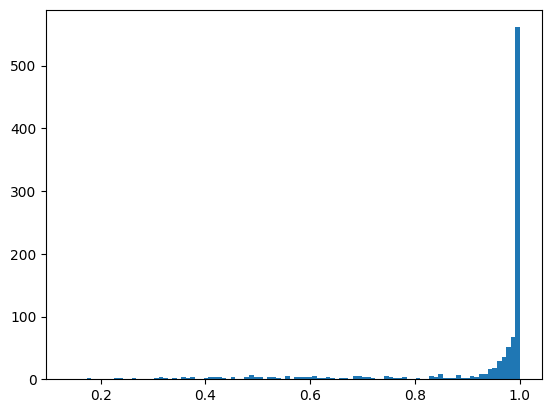

In [170]:
plt.hist(np.exp(-loss), bins=100);

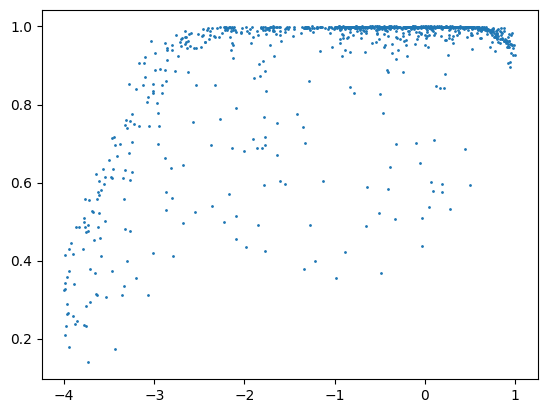

In [164]:
plt.scatter(y[:,0], np.exp(-loss), s=1)

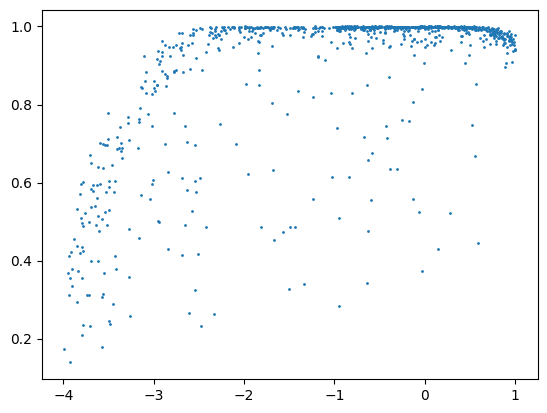

In [167]:
plt.scatter(y[:,1], np.exp(-loss), s=1)